# Business Problem Understanding

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\python driver\LoanData.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Understanding


- Loan_ID: Unique Loan ID

- Gender: Male/Female

- Married: Applicant married

- Dependents: Number of dependents

- Education: Applicant Education

- Self_Employed : whether the applicant is Self employed

- ApplicantIncome: Applicant income

- CoapplicantIncome: Coapplicant income

- LoanAmount: Loan amount in thousands

- Loan_Amount_Term: Term of loan in months

- Credit_History: credit history meets guidelines 
- Property_Area: Urban/ Semi Urban/ Rural

- Loan_Status: Loan approved target variable

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data['Loan_ID'].nunique()  # nunique means number of unique values

614

# Drop unimportant columns as per feature Selection (Filter Method)

In [6]:
data.drop(columns=["Loan_ID"],inplace=True)

In [7]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
data['Income']=(data['ApplicantIncome']+data['CoapplicantIncome'])
data['Income']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Income, Length: 614, dtype: float64

In [18]:
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [19]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [20]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [32]:
data['Credit_History']=data['Credit_History'].replace({1:'good',0:'bad'})
data['Credit_History']

0      good
1      good
2      good
3      good
4      good
       ... 
609    good
610    good
611    good
612    good
613     bad
Name: Credit_History, Length: 614, dtype: object

In [33]:
data['Credit_History'].value_counts()

good    475
bad      89
Name: Credit_History, dtype: int64

In [34]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [35]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [36]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [37]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [38]:
continous =['Income','LoanAmount']

discrete_categorical =['Gender','Married','Education','Self_Employed',
                       'Credit_History','Property_Area','Loan_Status']

discrete_count= ['Dependents','Loan_Amount_Term']


In [39]:
data.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

# Exploratory Data Analysis (EDA)

for continous Variables

In [40]:
data[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


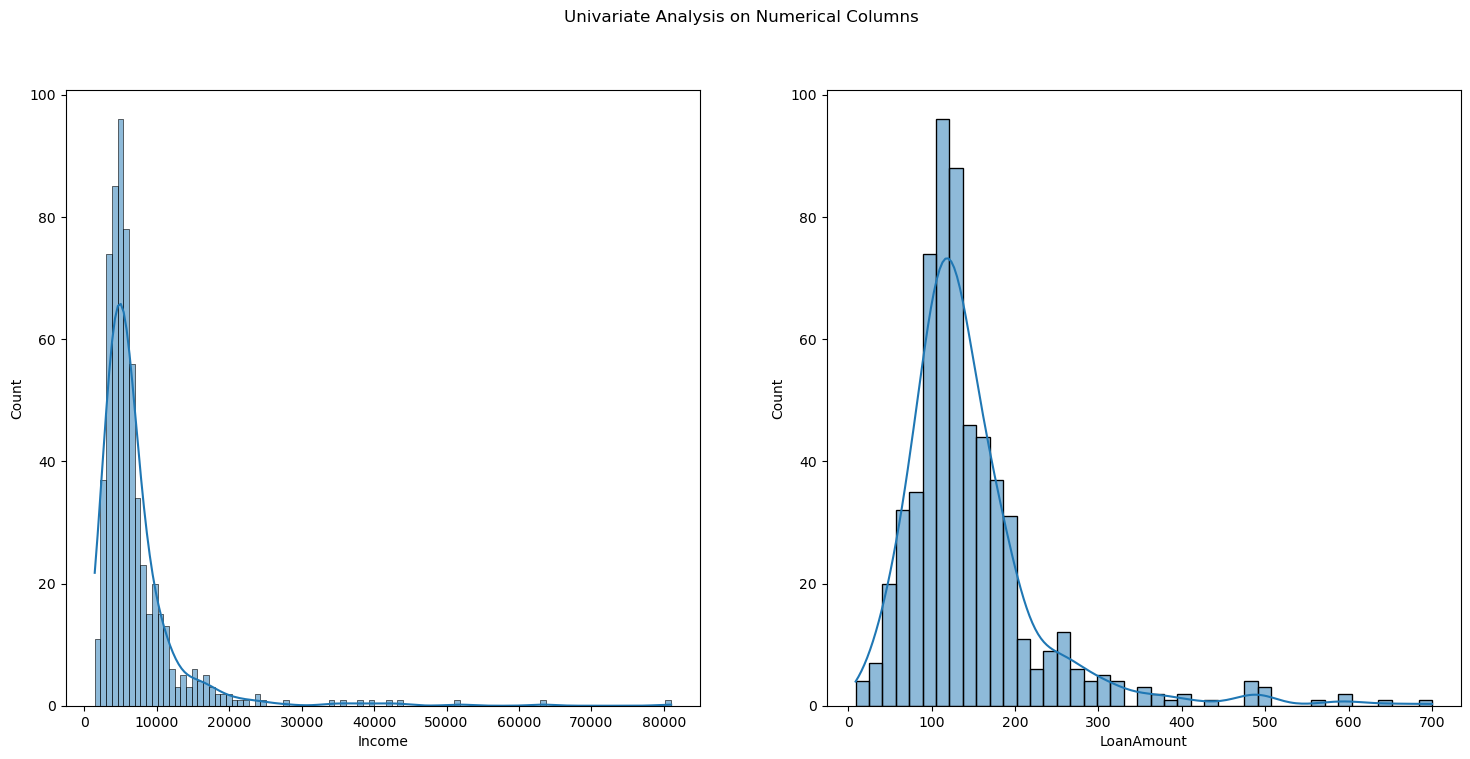

In [41]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(1,2,1)
sns.histplot(data['Income'],kde=True)
plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde=True)
plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [42]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

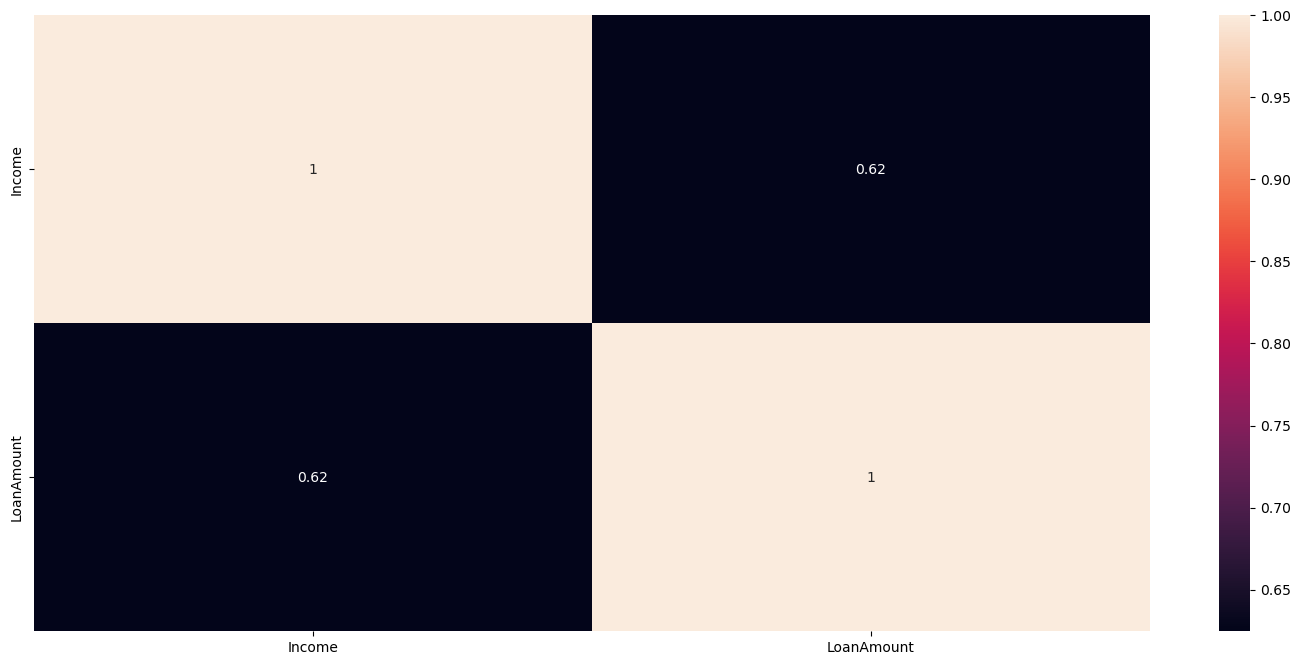

In [43]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

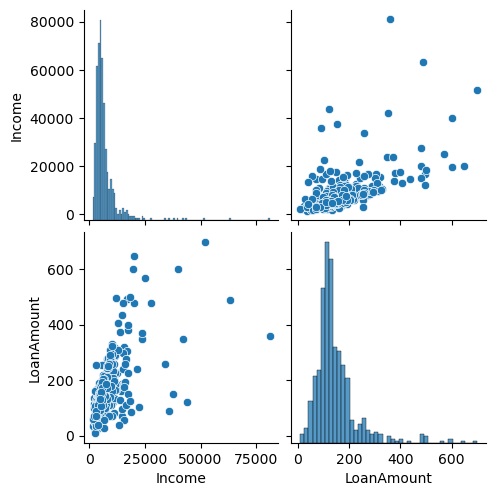

In [44]:
sns.pairplot(data[continous])
plt.show()

# for Discrete Variables

In [45]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


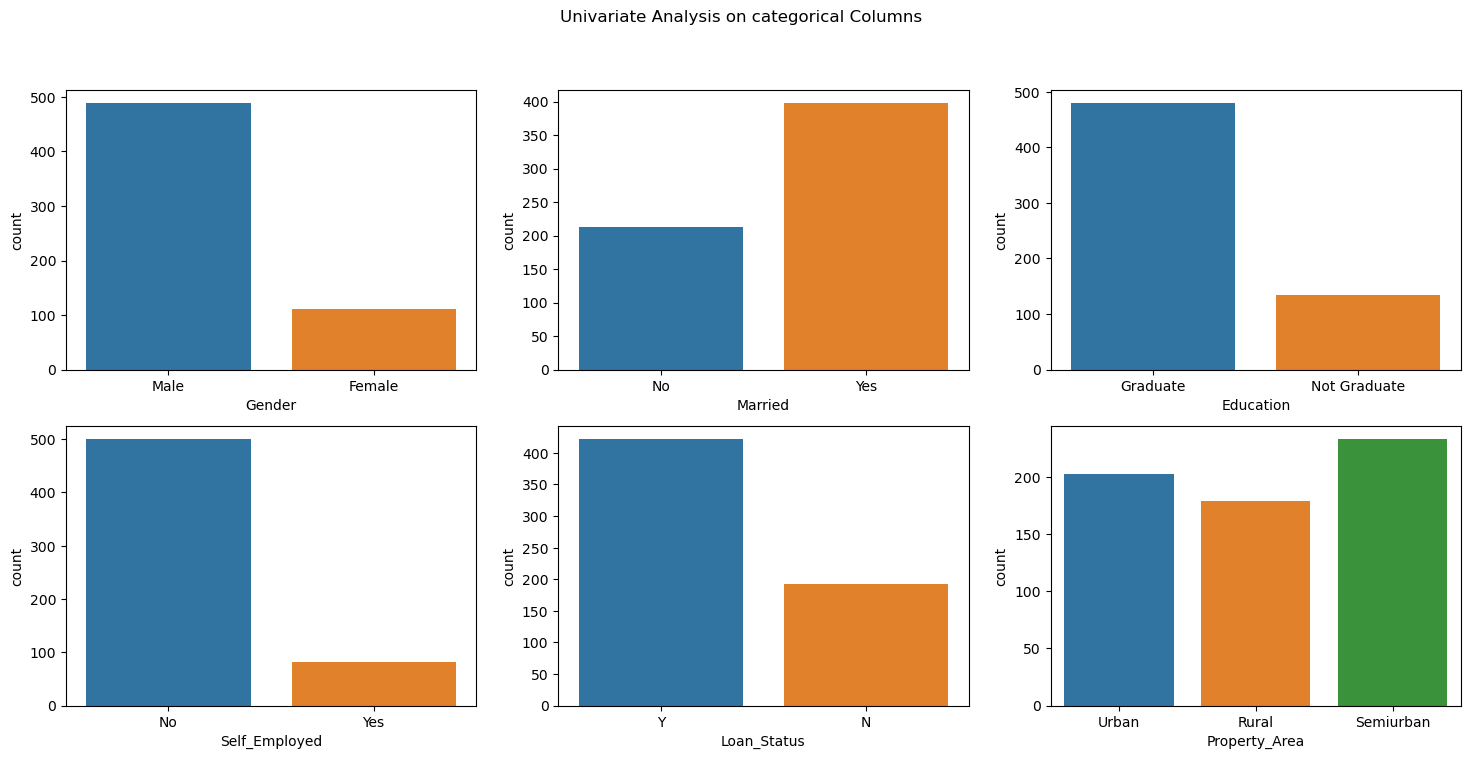

In [46]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Education'])

plt.subplot(2,3,4)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,5)
sns.countplot(data['Loan_Status'])

plt.subplot(2,3,6)
sns.countplot(data['Property_Area'])
plt.suptitle('Univariate Analysis on categorical Columns')

plt.show()



# check for Missing Values

In [47]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

# chech the skewness

In [48]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

# check outliers

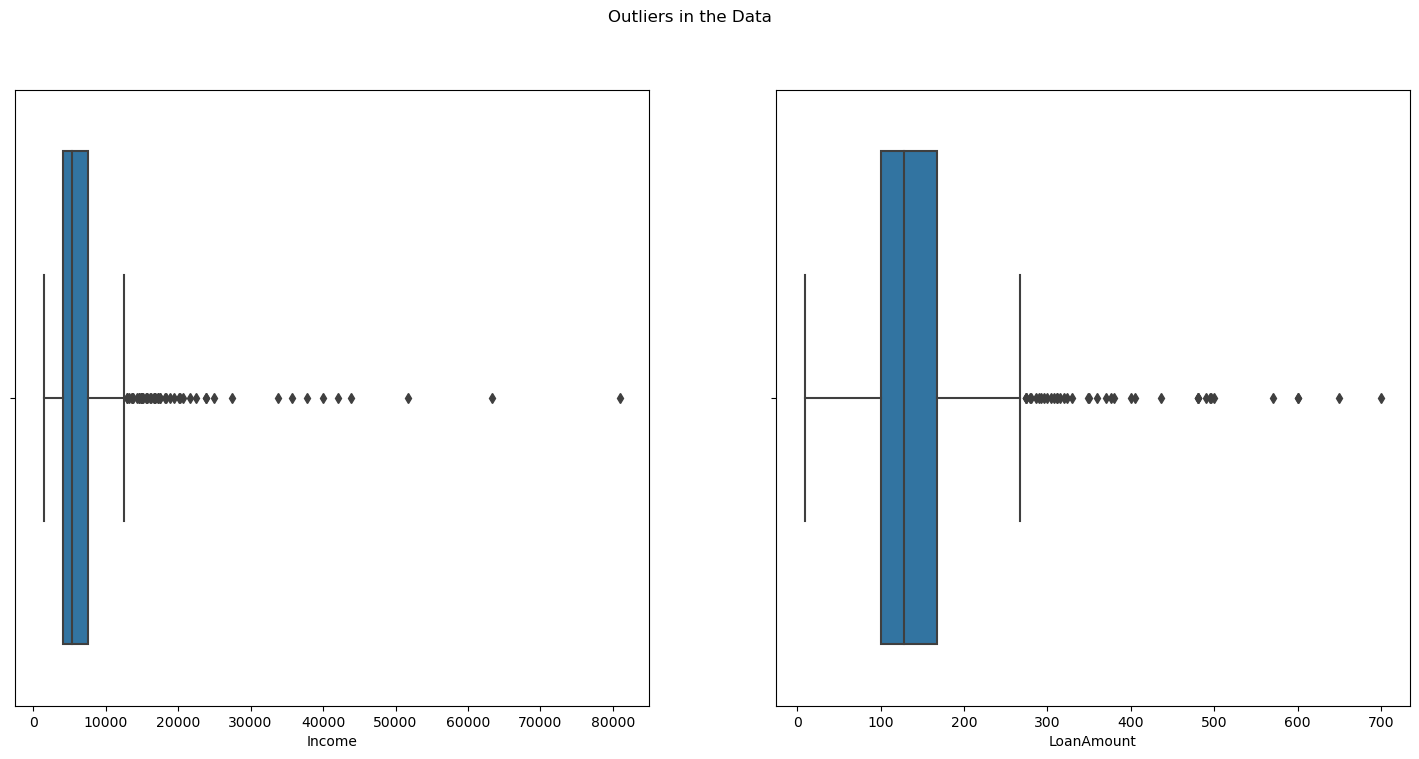

In [49]:
# lets visualize the outliers using Box plot

plt.subplot(1,2,1)
sns.boxplot(data['Income'])


plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()


# Stage-3: Data Preparation
    

# 1.Data Cleaning

  - Wrong data
  - Missing values
  - wrong data type
  - duplicates
  - outliers
  
  

# Wrong Data treatment

In [41]:
data['Dependents']=data['Dependents'].replace({'3+':3})

In [42]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

# Missing Values Treatment

In [43]:
data['Dependents']=data['Dependents'].fillna(0)
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data=data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

# data  type conversion

In [44]:
data['Dependents']=data['Dependents'].astype('int')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')

# Outliers treatment

In [45]:
# outliers should be retrained ( because really some people will have high income)

In [51]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [48]:
data.to_excel('Cleaned.xlsx')

In [49]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360,good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360,good,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360,good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360,good,Urban,Y,7583.0


In [50]:
pwd


'C:\\Users\\Sudheerkumar Peesa'